# 作業二：Kaggle自選題_Space Titannic

## 1. 訓練模型

* ##### 導入所需的套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

* ##### 導入訓練模型的資料---train.csv

In [2]:
df=pd.read_csv("train.csv")

* ##### 觀察資料
> 發現資料有許多空值，且有些為object，這些在之後都要進行修改整理

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* ##### 接著我們觀察這些資料與Transported是否有關連(dropna=True->忽略空值)
> 其中我發現VIP與Transported的關聯性不大，且the target split is more or less equal.
> 故VIP似乎不是一個有用的feature

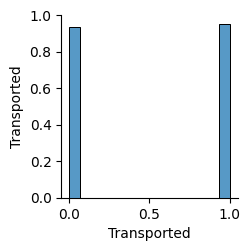

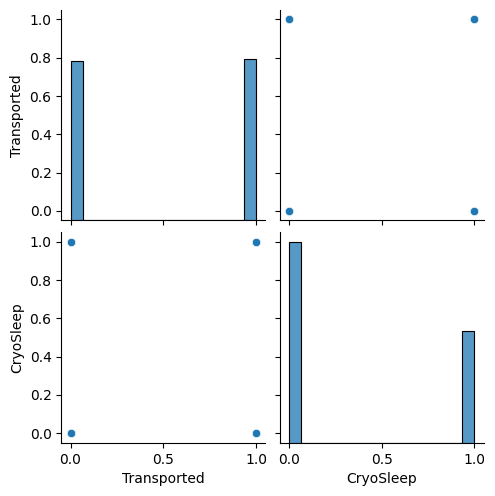

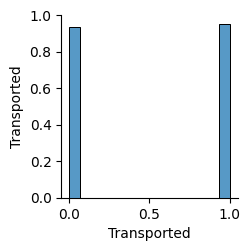

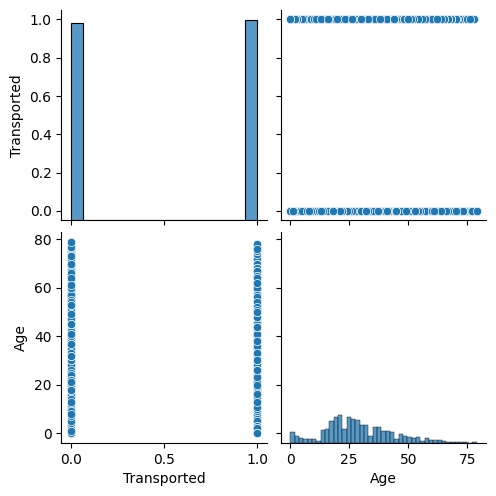

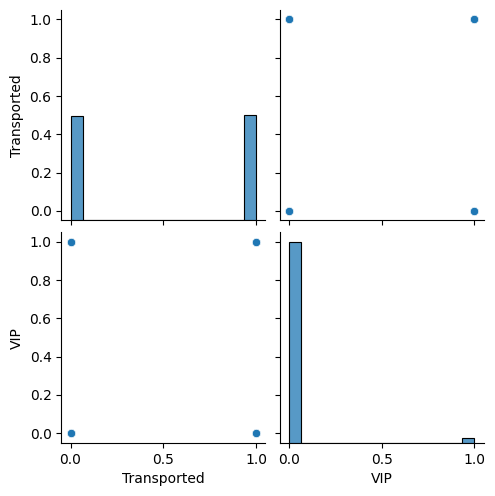

In [4]:
#看母星跟有無進入異空間是否有關聯
sns.pairplot(df[['Transported','HomePlanet']],dropna=True)
#是否沉睡
sns.pairplot(df[['Transported','CryoSleep']],dropna=True)
#destination
sns.pairplot(df[['Transported','Destination']],dropna=True)
#年紀
sns.pairplot(df[['Transported','Age']],dropna=True)
#VIP
sns.pairplot(df[['Transported','VIP']],dropna=True)

* ##### 丟棄一些用不到的資料

In [5]:
df.drop(['Name','VIP'],axis=1,inplace=True) 

* ##### 接著，觀察各項的空值
* ##### 並且檢查該空值的數量是否已經超過總資料的一半了
> 若已超過則捨棄，若沒有則在下一步去補空值

In [6]:
df.isnull().sum() 
#發現皆沒有超過半數
df.isnull().sum() > (len(df)/2)

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

* ##### 處理空值：
1. Age的空值部分 -> 我取非空值的平均值去補
2. HomePlanet的空值部分 -> 我先找出HomePlanet欄位中最大值：E(Earth)，再拿這個值去補空值
3. CryoSleep的空值部分 -> 一樣我先找出最大值，再拿該值去補齊空值
4. Cabin的空值部分 -> 在處理Carbin的資料時，我使用apply函數，對Carbin欄位進行處理，最後只取出Side的部分做分析，並取出最大值，補齊空值
5. Destination的空值部分 -> 先找出最大值，再拿該值去補齊空值
6. 五個消費(RoomService,FoodCourt,ShoppingMall,Spa,VRDeck)的空值 -> 我皆取五個消費的平均值，用該值去補齊空值

In [7]:
#Age (取平均)
df['Age'].fillna(df['Age'].median(),inplace=True)

#處理HomePlanet的空值
#idxmax()找出最大值的別名 #Earth
df['HomePlanet'].value_counts().idxmax()
#把空值加入Earth
df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(),inplace=True)

#處理CryoSleep的空值
df['CryoSleep'].value_counts().idxmax()
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(),inplace=True)

#處理Cabin的空值(只取Side就好)
# 使用apply函數，對Cabin欄位進行處理
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[-1] if pd.notnull(x) else x)
df['Cabin'].value_counts().idxmax()
df['Cabin'].fillna(df['Cabin'].value_counts().idxmax(),inplace=True)

#處理目的地的空值
df['Destination'].value_counts().idxmax()
df['Destination'].fillna(df['Destination'].value_counts().idxmax(),inplace=True)

#再來處理五個消費的空值
#RoomService的平均值
df["RoomService"].mean()
df['RoomService'].fillna(df["RoomService"].mean(),inplace=True)
#FoodCourt
df["FoodCourt"].mean()
df['FoodCourt'].fillna(df["FoodCourt"].mean(),inplace=True)
#ShoppingMall
df["ShoppingMall"].mean()
df['ShoppingMall'].fillna(df["ShoppingMall"].mean(),inplace=True)
#Spa
df["Spa"].mean()
df['Spa'].fillna(df["Spa"].mean(),inplace=True)
#VRDeck
df["VRDeck"].mean()
df['VRDeck'].fillna(df["VRDeck"].mean(),inplace=True)

* ##### 檢查資料
> 發現非空值都補滿了

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(4)
memory usage: 696.2+ KB


* ##### 且發現有些資料是object，所以要做轉換

In [9]:
#將HomePlanet, CryoSleep, Cabin, Destination進行轉換
df=pd.get_dummies(data=df,dtype=int,columns=['HomePlanet','CryoSleep','Cabin','Destination'])

* ##### 觀察數據：兩兩配對的相關性(不含空值)

In [10]:
#做所有欄位的兩兩配對的相關性(不含空值)
df.drop(['PassengerId'],axis=1).corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_P,Cabin_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
Age,1.000000,0.067830,0.127983,0.032958,0.120878,0.099248,-0.074233,-0.200814,0.217336,0.015831,0.071323,-0.071323,-0.011621,0.011621,0.016817,-0.028121,0.002832
RoomService,0.067830,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.139941,-0.067476,0.245451,0.243986,-0.243986,0.007503,-0.007503,-0.024288,-0.062828,0.061098
FoodCourt,0.127983,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,-0.215384,0.365500,-0.124781,0.205682,-0.205682,-0.019602,0.019602,0.134994,-0.065542,-0.078216
ShoppingMall,0.032958,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.071708,-0.021019,0.111257,0.206366,-0.206366,0.021922,-0.021922,-0.013346,-0.031397,0.031603
Spa,0.120878,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,-0.159188,0.266323,-0.088140,0.198392,-0.198392,-0.005739,0.005739,0.075242,-0.053428,-0.032948
VRDeck,0.099248,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,-0.153676,0.282118,-0.111875,0.193107,-0.193107,0.008975,-0.008975,0.089818,-0.045454,-0.050878
Transported,-0.074233,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,-0.168845,0.176916,0.019544,-0.460132,0.460132,-0.101397,0.101397,0.108722,0.000092,-0.096319
HomePlanet_Earth,-0.200814,-0.139941,-0.215384,-0.071708,-0.159188,-0.153676,-0.168845,1.000000,-0.633221,-0.559658,0.107231,-0.107231,0.018114,-0.018114,-0.156169,0.231177,-0.007418
HomePlanet_Europa,0.217336,-0.067476,0.365500,-0.021019,0.266323,0.282118,0.176916,-0.633221,1.000000,-0.287022,-0.093395,0.093395,-0.040700,0.040700,0.293517,-0.163308,-0.156958
HomePlanet_Mars,0.015831,0.245451,-0.124781,0.111257,-0.088140,-0.111875,0.019544,-0.559658,-0.287022,1.000000,-0.032715,0.032715,0.021160,-0.021160,-0.120996,-0.111260,0.177243


* ##### 準備要訓練的資料：
> X軸為df中所有資料，刪除了我們要的目標變數Transported
> y軸為我們的目標資料，Transported

In [11]:
#prepare training data
X = df.drop(['Transported'],axis=1)
y = df['Transported']

* ##### 接著做資料分割，以便進行模型的訓練和測試
* ##### 將資料集分割為訓練集和測試集
> 把特徵矩陣 X 和目標變數 y 分割成訓練 (X_train, y_train) 和測試集 (X_test, y_test)
> 30%的資料用於測試，random_state=67 是一個隨機state，確保分割的結果可重複

In [12]:
#split to training data & testing data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=67)

* ##### 有了訓練集和測試集，接著可以使用這些資料進行模型的訓練和評估
> 首先，匯入Logistic Regression模型
> 接著建立Logistic Regression模型的實例，並設置最大迭代次數為200，for確保模型在訓練中的收斂性
> 模型訓練(fitting)，該模型將通過迭代學習，調整模型的權重以達到最小誤差。
> 最後進行預測


In [13]:
#using Logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

* ##### 再來評估Logistic Regression 模型的性能：
> 首先匯入模組和函式
> 使用不同的評估指標計算模型性能：
> 1. accuracy（準確度）-> 正確預測的樣本數佔總體樣本數的比例
> 2. recall (召回率) -> 實際 Transported 中被正確預測為 Transported 的數量，佔實際 Transported 數量的比例
> 3. precision (精確度) -> 被模型正確預測為 Transported 的數量，佔所有被模型預測為 Transported 的數量的比例
> 混淆矩陣：供模型在每個類別上的分類結果(混淆矩陣的行表示實際類別，列表示預測類別)
> 在最後以DataFrame顯示混淆矩陣

In [15]:
#Evaluate
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
#用不同的公式算出來有不同的結果
accuracy_score(y_test,predictions)
recall_score(y_test,predictions)
precision_score(y_test,predictions)

0.732824427480916

In [16]:
confusion_matrix(y_test,predictions)
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Transported','Predict Transported'],index=['True not Transported','True Transported'])

,Predict not Transported,Predict Transported
True not Transported,876,420
True Transported,160,1152


* ##### 最後，導出模型

In [17]:
#model Export
import joblib
#生成模型檔
joblib.dump(lr,'Space_Titanic-LR-20231110.pkl',compress=3) 

['Space_Titanic-LR-20231110.pkl']

## 2. 測試模型

+ ##### 匯入我們訓練好的模型

In [18]:
#匯入模型
import joblib
model_pretrained = joblib.load('Space_Titanic-LR-20231110.pkl')

+ ##### 導入套件
+ ##### 並匯入考題---test.csv

In [19]:
import pandas as pd
#匯入考題
df_test=pd.read_csv("test.csv")

+ ##### 將test中的Name和VIP資料丟掉

In [20]:
df_test.drop(['Name','VIP'],axis=1,inplace=True) 

+ ##### 補齊test中各資料的空值

In [21]:
#補Age的空
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
#HomePlanet
df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(),inplace=True)
#CryoSleep
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(),inplace=True)
#Cabin
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: str(x)[-1] if pd.notnull(x) else x)
df_test['Cabin'].fillna(df_test['Cabin'].value_counts().idxmax(),inplace=True)
#目的地
df_test['Destination'].fillna(df_test['Destination'].value_counts().idxmax(),inplace=True)
#RoomService
df_test['RoomService'].fillna(df_test["RoomService"].mean(),inplace=True)
#FoodCourt
df_test['FoodCourt'].fillna(df_test["FoodCourt"].mean(),inplace=True)
#ShoppingMall
df_test['ShoppingMall'].fillna(df_test["ShoppingMall"].mean(),inplace=True)
#Spa
df_test['Spa'].fillna(df_test["Spa"].mean(),inplace=True)
#VRDeck
df_test['VRDeck'].fillna(df_test["VRDeck"].mean(),inplace=True)

+ ##### 把型態為object的資料都轉成int

In [22]:
df_test=pd.get_dummies(data=df_test,dtype=int,columns=['HomePlanet','CryoSleep','Cabin','Destination'])

+ ##### 接著，使用預先訓練好的模型model_pretrained對我要測試的考題 df_test進行預測，得到預測結果prediction2

In [23]:
prediction2 = model_pretrained.predict(df_test)

+ ##### 創建一個新的 DataFrame forSubmissionDF，包含兩個欄位：PassengerId 和 Transported，並顯示出來
> PassengerID為test中的PassengerID資料
> Transported為上面預測的結果prediction2

In [24]:
#prepare submit file
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId'] = df_test['PassengerId']
forSubmissionDF['Transported'] = prediction2
forSubmissionDF

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


+ ##### 最後，將整理好的forSubmissionDF的DataFrame寫入到Space_titannic_for_submission_20231110 CSV 檔案中

In [ ]:
forSubmissionDF.to_csv('Space_titannic_for_submission_20231110.csv',index=False)